In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import string 
import nltk 
import warnings

warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
twitter_data = pd.read_csv("Twitter Sentiments.csv")
twitter_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#data information
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
twitter_data.shape

(31962, 3)

<h2 align="center">Preprocessing Data</h2>

In [9]:
def remove_pattern(input_txt, pattern):
    r =re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word," ",input_txt)
    return input_txt

In [7]:
twitter_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<h2 align="center">Removing twitter user names</h2>

In [11]:
twitter_data['clean_tweet'] = np.vectorize(remove_pattern)(twitter_data['tweet'], "@[\w]*")
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#remove special characters
twitter_data['clean_tweet']= twitter_data['clean_tweet'].apply(lambda x:x.split())
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#model, i, love, u, take, with, u, all, the, ..."
4,5,0,factsguide: society now #motivation,"[factsguide:, society, now, #motivation]"


In [14]:
# remove twitter handles (@user)

twitter_data['clean_tweet'] = np.vectorize(remove_pattern)(twitter_data['tweet'], "@[\w]*")
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
#remove special characters, numbers and punctuations
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [16]:
# remove short words
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [17]:
# individual words considered as tokens
tokenized_tweet = twitter_data['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

<h2 align="center"> STEM WORDS<\h2>

In [18]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [19]:
#combine the words into single sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

twitter_data['clean_tweet'] = tokenized_tweet
twitter_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [20]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 508.3 kB/s eta 0:00:00


<h2 align="center">Word Cloud Visualisation<\h2>

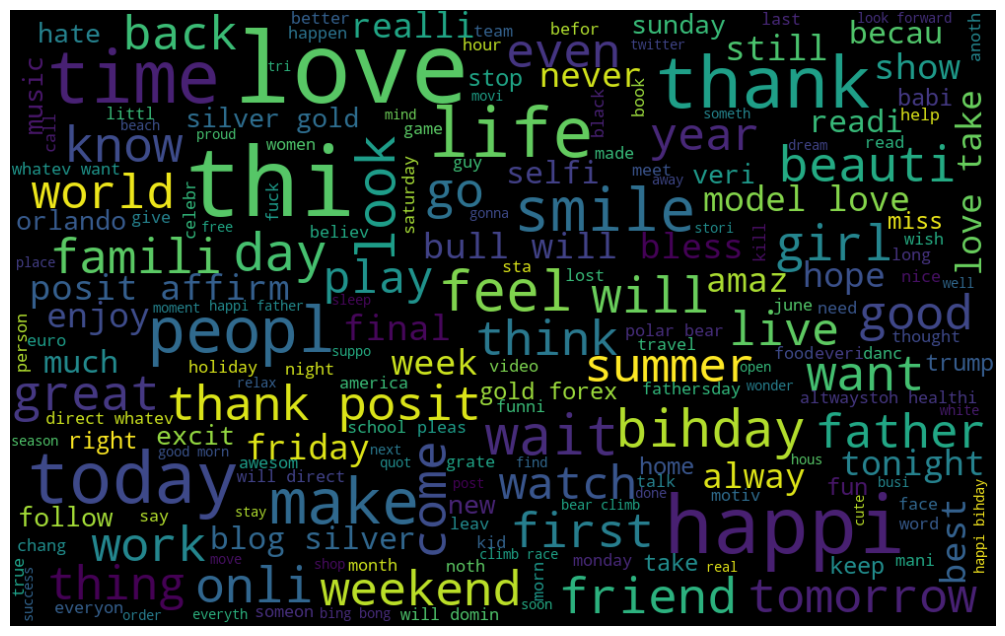

In [21]:
#visualiza the frequent words
all_words = " ".join([sentence for sentence in twitter_data['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=625, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

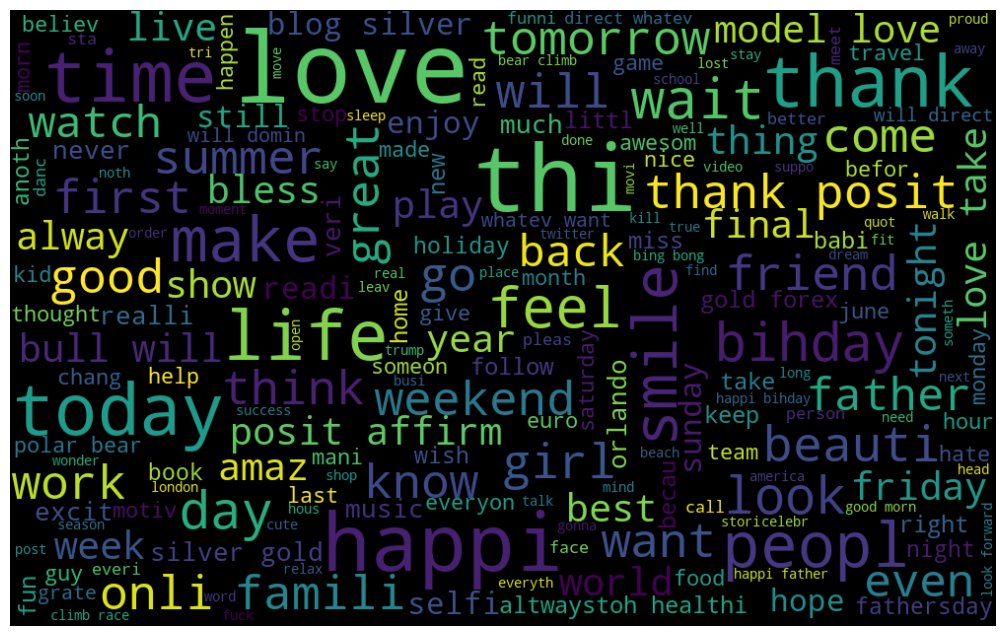

In [22]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in twitter_data['clean_tweet'][twitter_data['label']==0]])

wordcloud = WordCloud(width=1000, height=625, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

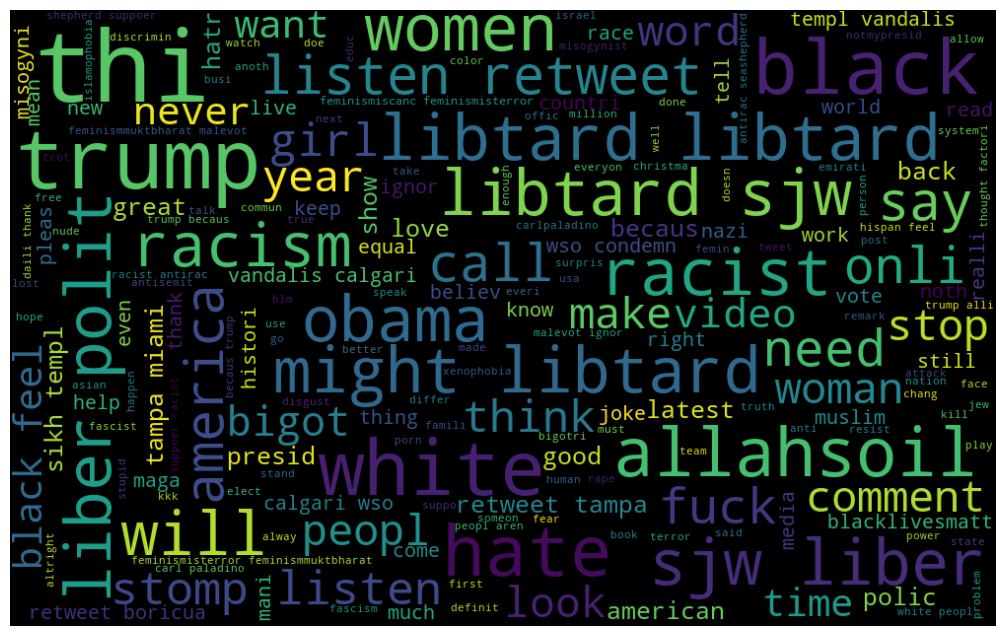

In [23]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in twitter_data['clean_tweet'][twitter_data['label']==1]])

wordcloud = WordCloud(width=1000, height=625, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [25]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(twitter_data['clean_tweet'][twitter_data['label']==0])

In [26]:
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(twitter_data['clean_tweet'][twitter_data['label']==1])

In [27]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [28]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]